In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import geobr
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
import unicodedata

In [ ]:
states = geobr.read_state(year=2020)

In [25]:
class State:
    def __init__(self, name, mean, sigla):
        self.name = name
        self.sigla = sigla
        self.mean = mean

s = [State("Paraná", 0, "PR"),
          State("Rio Grande do Sul", 0, "RS"),
          State("Santa Catarina", 0, "SC"),
          State("São Paulo", 0, "SP"),
          State("Rio de Janeiro", 0, "RJ"),
          State("Espírito Santo", 0, "ES"),
          State("Minas Gerais", 0, "MG"),
          State("Goiás", 0, "GO"),
          State("Mato Grosso", 0, "MT"),
          State("Mato Grosso do Sul", 0, "MS"),
          State("Distrito Federal", 0, "DF"),
          State("Alagoas", 0, "AL"),
          State("Bahia", 0, "BA"),
          State("Ceará", 0, "CE"),
          State("Maranhão", 0, "MA"),
          State("Paraíba", 0, "PB"),
          State("Pernambuco", 0, "PE"),
          State("Piauí", 0, "PI"),
          State("Rio Grande do Norte", 0, "RN"),
          State("Sergipe", 0, "SE"),
          State("Acre", 0, "AC"),
          State("Amapá", 0, "AP"),
          State("Amazonas", 0, "AM"),
          State("Pará", 0, "PA"),
          State("Rondônia", 0, "RO"),
          State("Roraima", 0, "RR"),
          State("Tocantins", 0, "TO"),]


def unaccent(text):
    texto_normalizado = unicodedata.normalize('NFD', text)
        # Filtra apenas os caracteres que não são diacríticos usando os valores Unicode
    texto_sem_acento = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')
    return texto_sem_acento

def dataset(minimum, name):
    for p in pathlib.Path("csv").rglob(f"{name}*{minimum}.csv"):
        df = pd.read_csv(p, sep=',', header = 0)
        df['state'] = df['state'].apply(lambda x: x.lower() if isinstance(x, str) else x)
        for ss in s:
            df2 = df[(df['state']==ss.name.lower()) | (df['state']==ss.sigla.lower()) | (df['state']==unaccent(ss.name.lower()))]
            if len(df2) > 0:
                levels = len(np.unique(df2["fold"]))
                ss.mean = ss.mean + (len(df2) / levels)

dataset(5, "regions")
for i, ss in enumerate(s):
    print(i, ss.name, ss.mean)
states['level']=[ss.sigla for ss in s]
states['total']=[ss.mean for ss in s]

0 Paraná 19.942857142857143
1 Rio Grande do Sul 4.35
2 Santa Catarina 16.233333333333334
3 São Paulo 10.127906976744185
4 Rio de Janeiro 9.246575342465754
5 Espírito Santo 5.482758620689655
6 Minas Gerais 11.736842105263158
7 Goiás 11.914285714285715
8 Mato Grosso 6.928571428571429
9 Mato Grosso do Sul 5.608695652173913
10 Distrito Federal 12.774193548387096
11 Alagoas 1.1
12 Bahia 18.875
13 Ceará 2.2
14 Maranhão 4.666666666666667
15 Paraíba 1.625
16 Pernambuco 2.7777777777777777
17 Piauí 3.0
18 Rio Grande do Norte 1.0
19 Sergipe 1.5
20 Acre 6.841269841269841
21 Amapá 3.4375
22 Amazonas 11.74736842105263
23 Pará 7.636363636363637
24 Rondônia 4.226415094339623
25 Roraima 4.641025641025641
26 Tocantins 5.0


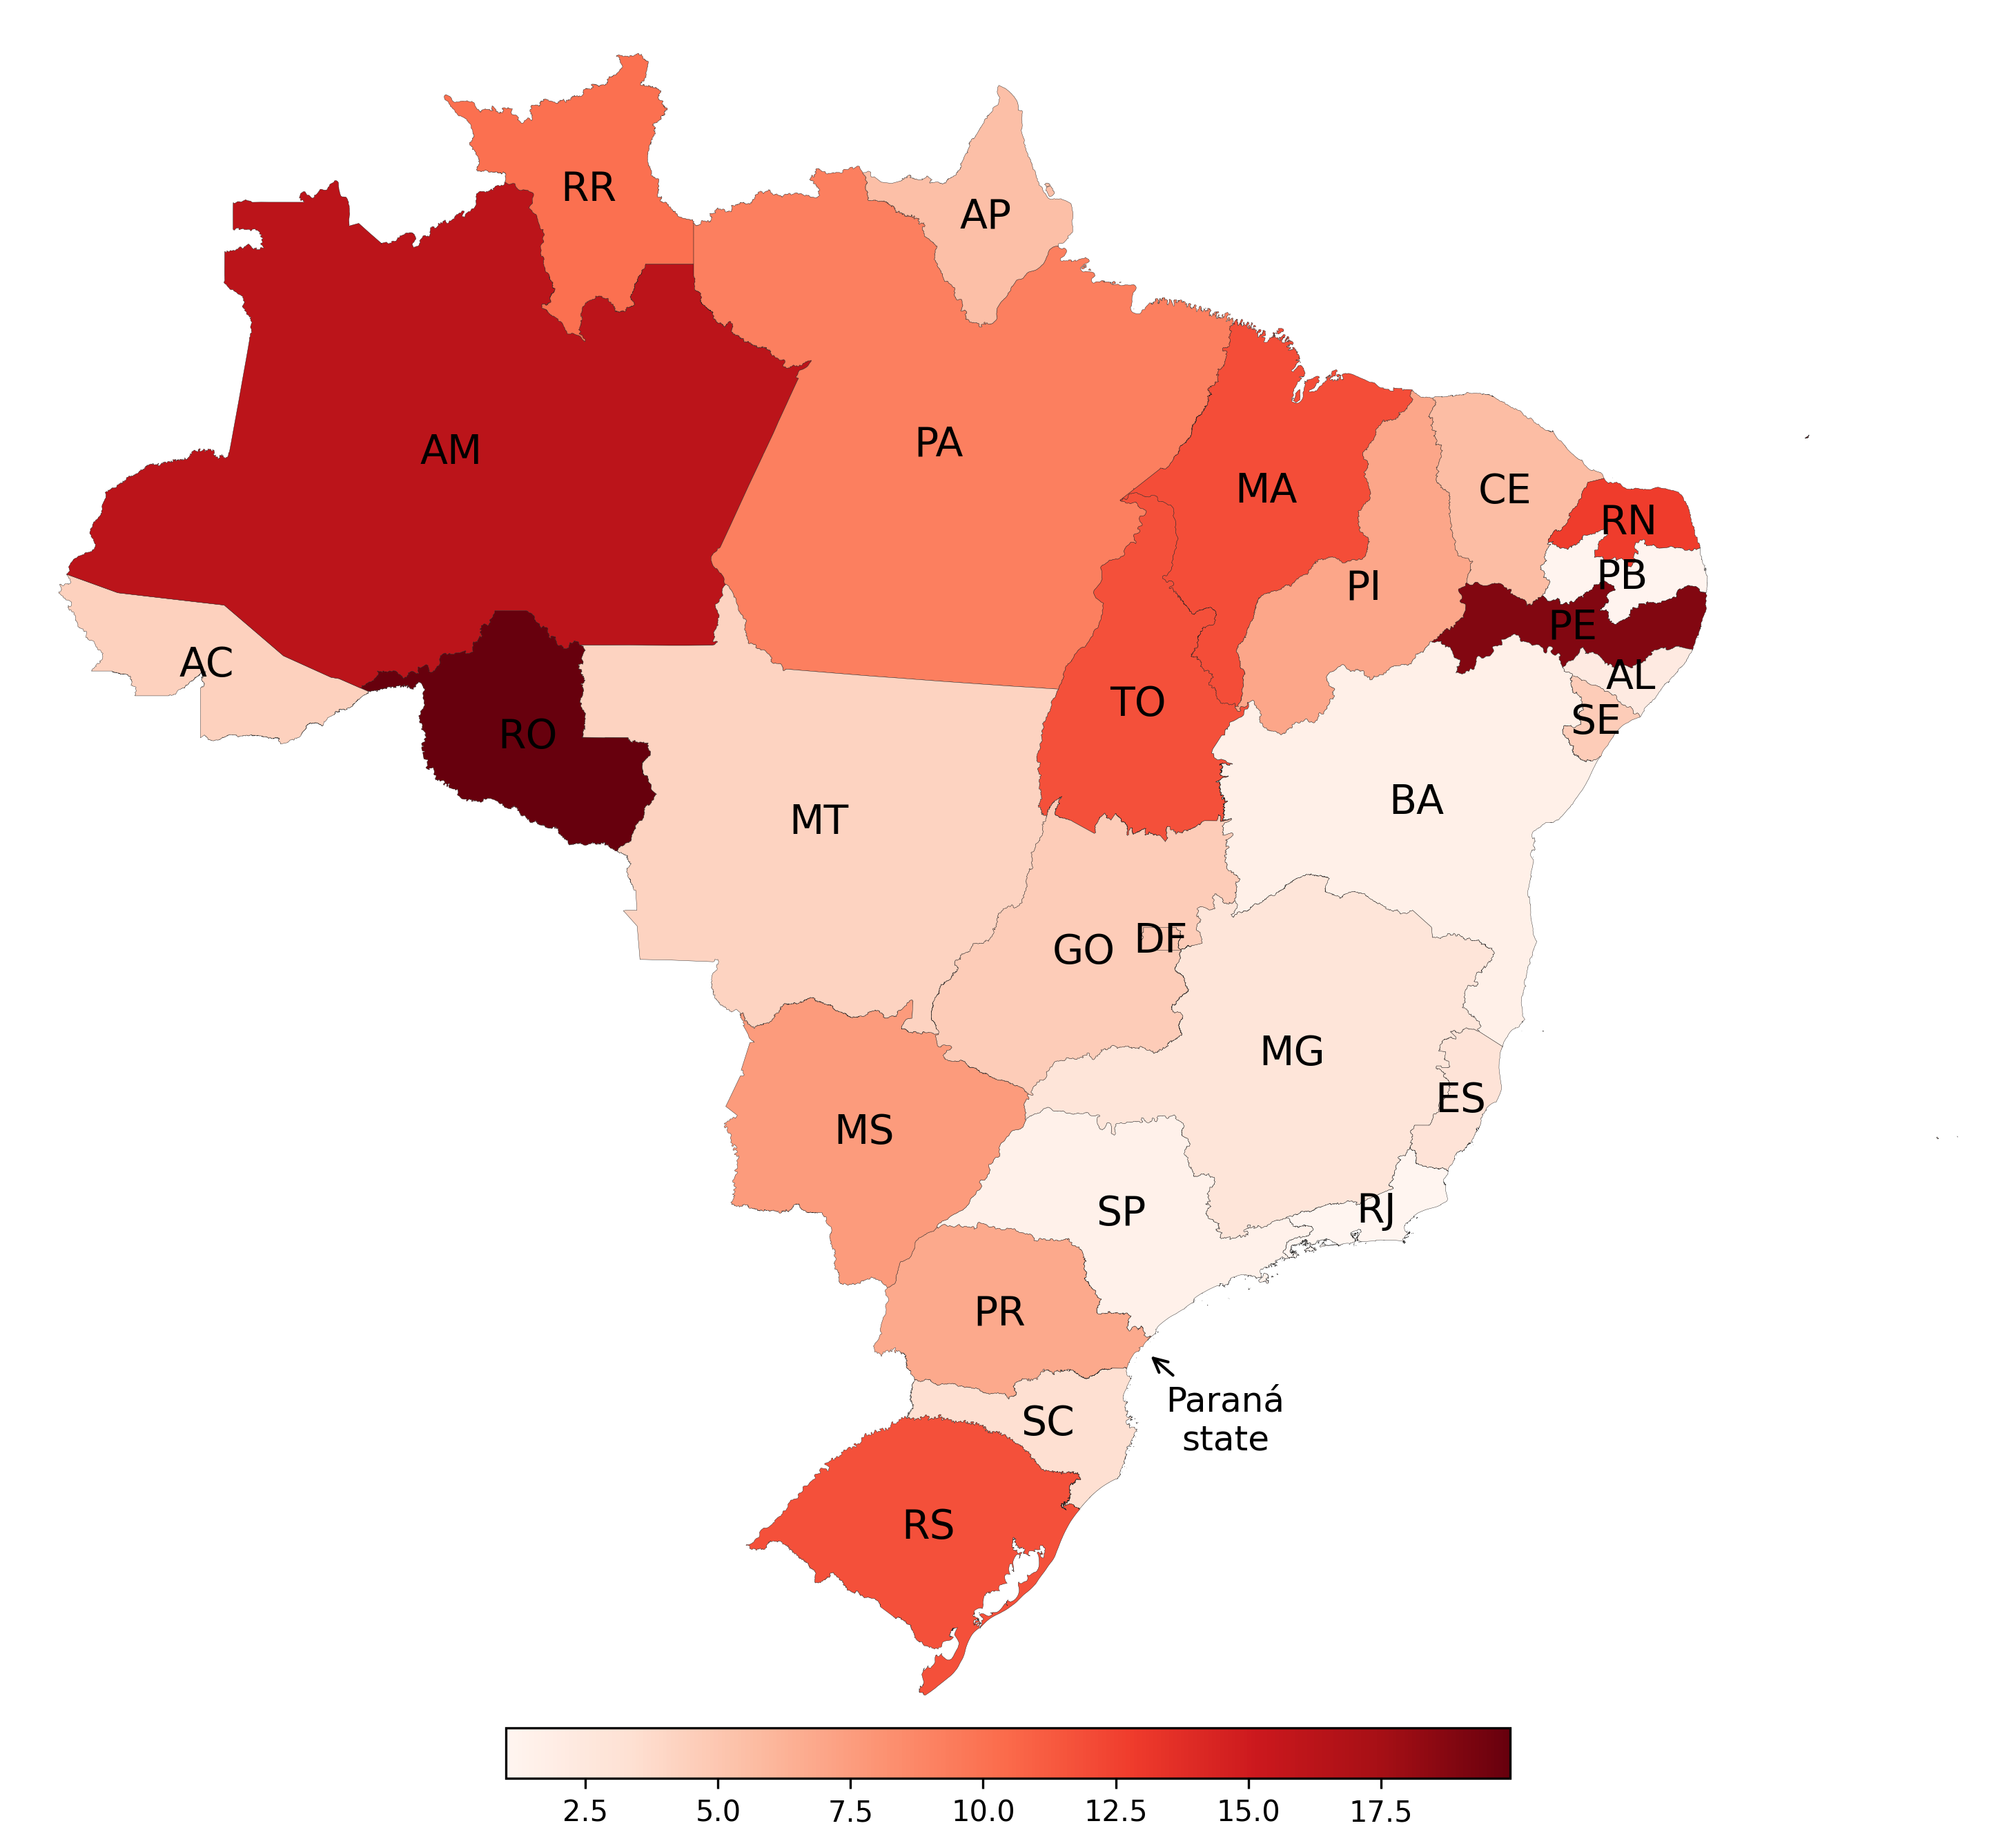

In [27]:
fig, ax = plt.subplots(figsize=(10,10), dpi=300, sharex=True, sharey=False)
states.plot(column='total', cmap='Reds', legend=True, ax=ax,
            linewidth=0.1, edgecolor='0.1',
            legend_kwds={'shrink':0.5, 'pad': 0.0, 'orientation':'horizontal'})
states.apply(lambda x: ax.annotate(text=x['abbrev_state'],
                                   xy=np.subtract(x.geometry.centroid.coords[0], (0, 0.32)),
                                   ha='center', fontsize=14), axis=1)

x, y, arrow_length = 0.57, 0.22, 0.04
ax.annotate('Paraná\nstate', xy=(x, y), xytext=(x+arrow_length, y-arrow_length),
            arrowprops={'facecolor':'black', 'arrowstyle':'->'},
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

ax.margins(0.02)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.savefig("states.svg", format="svg")